## Лабораторна робота 5. **CLASSIFICATION** 🔵/🔺

Оцінювання даної роботи буде ураховувати якість Ваших висновків та візуалізацій. При наявності ЛИШЕ коду та візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.  

Більшість поставлених в цій лабораторній роботі задач в майбутньому буде ставитись Вами самойстійно!

Під час виконання Вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

Оформлення коментарів повинно проводитися в текстових комірках ноутбука з використанням синтаксису [LaTeX](https://en.wikibooks.org/wiki/LaTeX/Basics) для оформлення тексту та формул. 

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

# Опис вибірки "bank-additional-full"

   # Input variables:
   `bank client data:`  
   1 - **age** (numeric)  
   2 - **job** : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")  
   3 - **marital** : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)  
   4 - **education** (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")  
   5 - **default**: has credit in default? (categorical: "no","yes","unknown")  
   6 - **housing**: has housing loan? (categorical: "no","yes","unknown")  
   7 - **loan**: has personal loan? (categorical: "no","yes","unknown")  
   # related with the last contact of the current campaign:  
   8 - **contact**: contact communication type (categorical: "cellular","telephone")   
   9 - **month**: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")  
  10 - **day_of_week**: last contact day of the week (categorical: "mon","tue","wed","thu","fri")  
  11 - **duration**: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.  
   # other attributes:  
  12 - **campaign**: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
  13 - **pdays**: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)  
  14 - **previous**: number of contacts performed before this campaign and for this client (numeric) 
  15 - **poutcome**: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")  
   # social and economic context attributes  
  16 - **emp.var.rate**: employment variation rate - quarterly indicator (numeric)  
  17 - **cons.price.idx**: consumer price index - monthly indicator (numeric)       
  18 - **cons.conf.idx**: consumer confidence index - monthly indicator (numeric)       
  19 - **euribor3m**: euribor 3 month rate - daily indicator (numeric)  
  20 - **nr.employed**: number of employees - quarterly indicator (numeric)  
    
   `Output variable (desired target):`  
  21 - **y** - has the client subscribed a term deposit? (binary: "yes","no")

## Імпорт необхідних бібліотек та завантаження даних

**Завдання 1** підготовка даних до опрацювання

1. завантажте вибірку `bank-additional-full.csv`;   
2. підключіть необхідні бібліотеки;  
3. вивести основну статистичну інформацію по числовим змінним;  
4. вивести розмірність датасету.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

df = pd.read_csv("bank-additional-full.csv", delimiter=";")

print(df.describe())

print(df.shape)


       age;"job";"marital";"education";"default";"housing";"loan";"contact";"month";"day_of_week";"duration";"campaign";"pdays";"previous";"poutcome";"emp.var.rate";"cons.price.idx";"cons.conf.idx";"euribor3m";"nr.employed";"y"
count                                               41188                                                                                                                                                                          
unique                                              41176                                                                                                                                                                          
top     27;"technician";"single";"professional.course"...                                                                                                                                                                          
freq                                                    2                               

**Завдання 2** підготовка цільової змінної  

1. проаналізувати атрибути вибірки, визначити цільовий атрибут `target atribute`;
2. якщо `target atribute` є категоріальним, його необхідно перетворити в чисельний.

In [10]:
import pandas as pd

df = pd.read_csv("bank-additional-full.csv")
print("Атрибути вибірки:")
print(df.columns)

target_attribute = 'age'

if df[target_attribute].dtype == 'object':
    df[target_attribute] = pd.Categorical(df[target_attribute])
    bank_target = df[target_attribute].cat.codes
    print("\nЦільова змінна після перетворення:")
    print(bank_target)
else:
    bank_target = df[target_attribute]
    print("\nЦільова змінна:")
    print(bank_target)


Атрибути вибірки:
Index(['age;"job";"marital";"education";"default";"housing";"loan";"contact";"month";"day_of_week";"duration";"campaign";"pdays";"previous";"poutcome";"emp.var.rate";"cons.price.idx";"cons.conf.idx";"euribor3m";"nr.employed";"y"'], dtype='object')


KeyError: 'age'

## Аналіз змінних, які характеризують клієнтів банку:

**Завдання 3** Визначитись зі всіма атрибутами, що характреризують кліентів банку:
- виділити їх в окрему частину;
- первірити всі змінні (які унікальні значення містять атрибути)(дивись опис датасету).

In [11]:
import pandas as pd

df = pd.read_csv("bank-additional-full.csv", delimiter=";")

bank_client_attributes = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan']

bank_client = df[bank_client_attributes]

for attribute in bank_client_attributes:
    unique_values = bank_client[attribute].unique()
    print(f"Значення '{attribute}': {unique_values}")


Значення 'age': [56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
Значення 'job': ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
Значення 'marital': ['married' 'single' 'divorced' 'unknown']
Значення 'education': ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
Значення 'default': ['no' 'unknown' 'yes']
Значення 'housing': ['no' 'yes' 'unknown']
Значення 'loan': ['no' 'yes' 'unknown']


**Завдання 4** Аналіз атрибуту `Age`:  
1. Вивести максимальне та мінімальне значення;  
2. Перевірити на наявність `NaN`;  
3. Провести візуальний аналіз зміної `Age`:
    - побудувати `countplot`, `boxplot`, `distplot`;
    - перевірити розподіл по змінній `Age` на важкі хвости.

Макс: 98
Мін: 17
Кількість NaN: 0


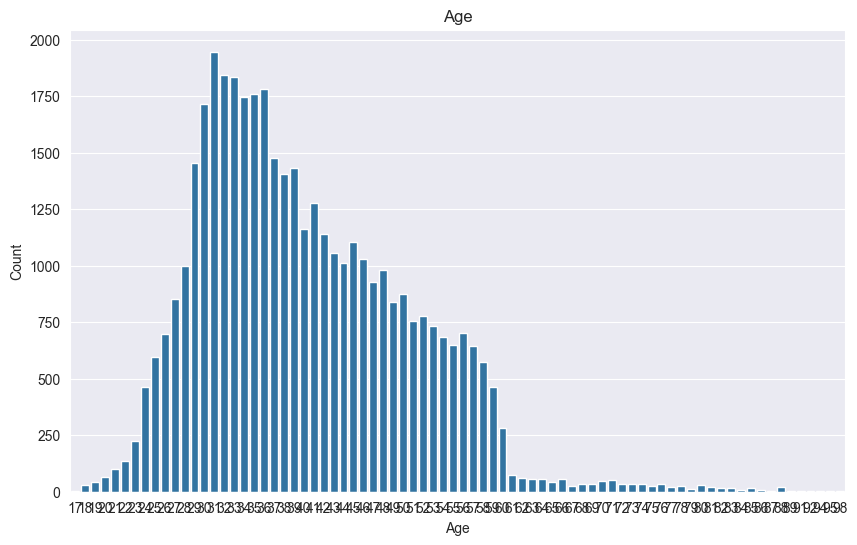

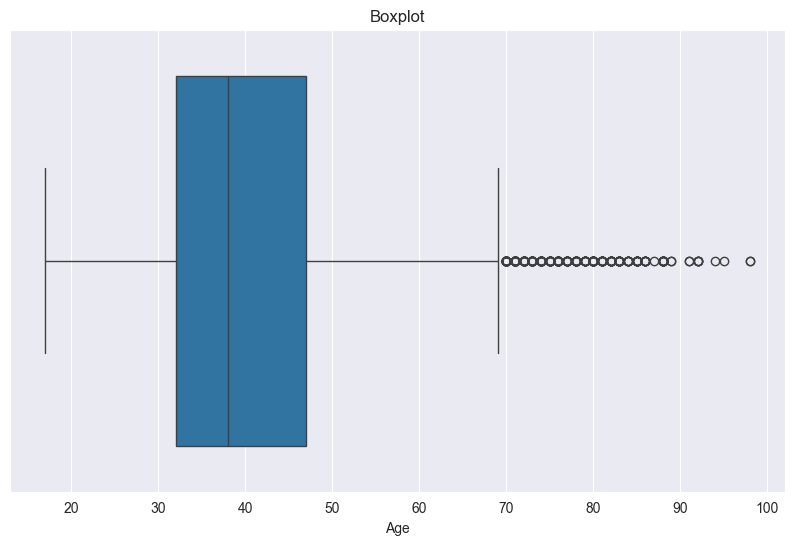

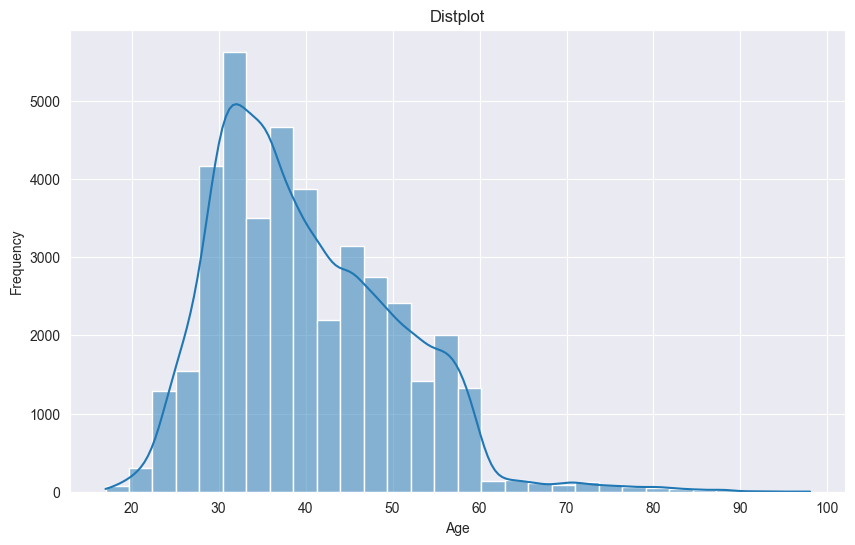

kurt: 0.7910698035273853
skewness: 0.7846682380932289


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

print("Макс:", df['age'].max())
print("Мін:", df['age'].min())

nan_count = df['age'].isna().sum()
print("Кількість NaN:", nan_count)

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='age')
plt.title('Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='age')
plt.title('Boxplot')
plt.xlabel('Age')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', kde=True, bins=30)
plt.title('Distplot')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

from scipy.stats import kurtosis, skew
kurt = kurtosis(df['age'])
skewness = skew(df['age'])
print("kurt:", kurt)
print("skewness:", skewness)


**Висновки з 1-4 завдання (детальні)**

1.   Получення даних по датасету щоб базово його оцінити
2.   Звичайна конвертація данних в цифри для пришвидшення роботи з датасетом
3.  Так можна вивести атрибути, які характеризують клієнтів і вже окремо працювати з цими данними
4. Я получив мінімальний і максимальний вік, за допомогою цього можна поняти діапазон, потім получив кількість значень які пропущені, знаючи ту кількілсть я можу вже відштовхуватись від неї і якось обробляти пропуски
Вивів на графіки Age, так можна зручніше це все аналізувати

**Завдання 5** Перевірити атрибут `Age` на викиди: 

In [15]:
import numpy as np
import pandas as pd

def detect_outliers_with_interquantile_range(df: pd.DataFrame,
                                             column: str,
                                             low_percentile: int,
                                             high_percentile: int) -> pd.DataFrame:
    """
    Detecting outliers using interquantile range set manually

    df: pd.DataFrame to detect outliers
    column: target column
    low_percentile: lower bound between 0 and 100
    high_percentile: upper bound between 0 and 100

    returns: pd.DataFrame with detected outliers

    """
    sorted_data = np.sort(df[column])
    # Calculate Q1, Q2, Q3 and IQR.
    Q1 = np.percentile(sorted_data, low_percentile)
    Q3 = np.percentile(sorted_data, high_percentile)
    print('')
    print(f"Q1 {low_percentile} percentile of the given data: {Q1}")
    print('')
    print(f"Q3 {high_percentile} percentile of the given data: {Q3}")
    print('')
    print('----------------------------------------------------------')

    IQR = Q3 - Q1
    print('')
    print(f"Interquantile range: {IQR}")
    print('')
    print('----------------------------------------------------------')
    low_lim = Q1 - 1.5 * IQR
    up_lim = Q3 + 1.5 * IQR
    print('')
    print(f" Lower bound: {low_lim}")
    print('')
    print(f" Upper bound: {up_lim}")
    print('')
    print('----------------------------------------------------------')
    outliers = df[(df[column] > up_lim) | (df[column] < low_lim)]
    print('')
    print(f"Outliers in the dataset:")
    display(outliers)

    return outliers


In [16]:
outliers = detect_outliers_with_interquantile_range(bank_client, 'age', 10, 90)


Q1 10 percentile of the given data: 28.0

Q3 90 percentile of the given data: 55.0

----------------------------------------------------------

Interquantile range: 27.0

----------------------------------------------------------

 Lower bound: -12.5

 Upper bound: 95.5

----------------------------------------------------------

Outliers in the dataset:


,age,job,marital,education,default,housing,loan
38452,98,retired,married,basic.4y,unknown,yes,no
38455,98,retired,married,basic.4y,unknown,yes,no


**Висновки з завдання 5 (детальні)**

1.   Обчислення першого і третього квантиля, вони ділять значення по 25%
2.   була знайдена різниця між ними
3.   Визначені межі викидів

Загалом код аналізує наявність викидів в Age, їх дальше треба аналізувати і вже шось з ними робити і обробляти. 

**Завдання 6** Аналіз атрибутів `job`, `marital` та `education`:  
- Побудувати графіки розподілу даних по цим змінним.

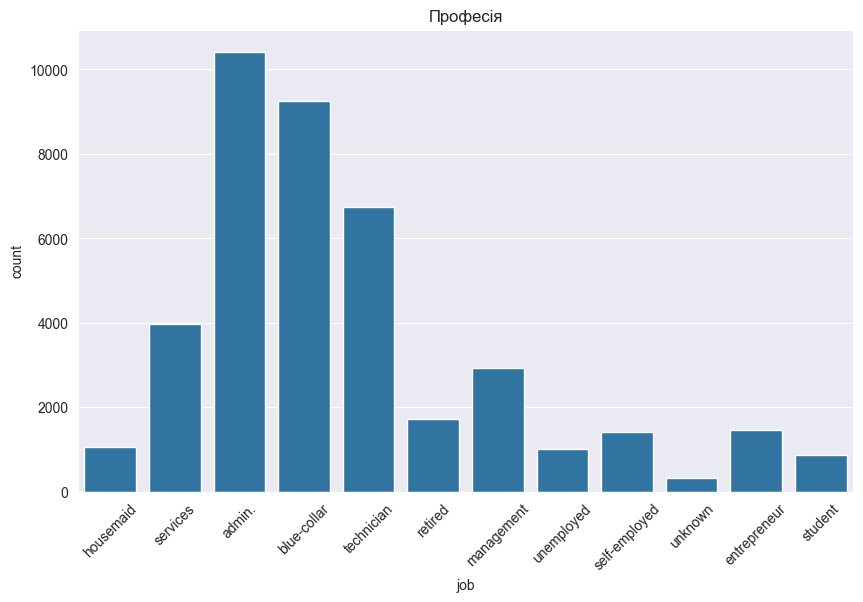

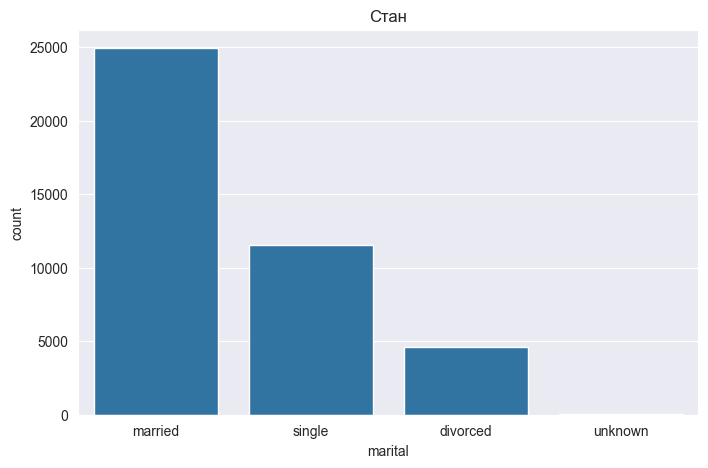

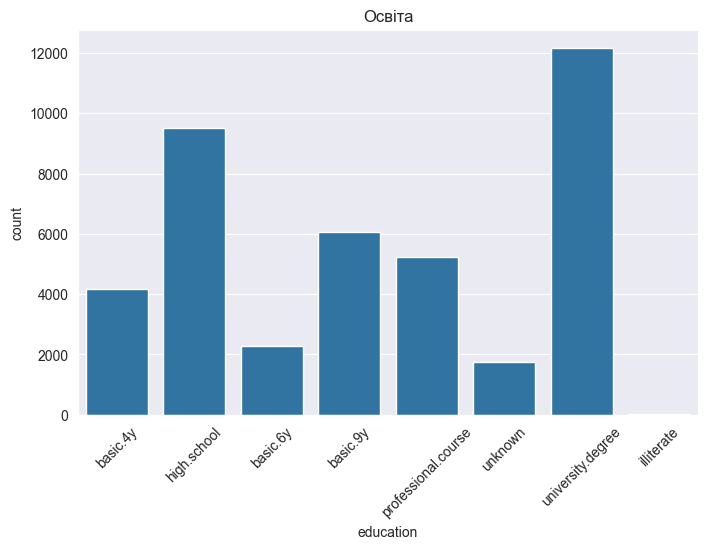

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("bank-additional-full.csv", delimiter=";")

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='job')
plt.title('Професія')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='marital')
plt.title('Стан')
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='education')
plt.title('Освіта')
plt.xticks(rotation=45)
plt.show()


In [ ]:
#code

In [ ]:
#code

**Висновки з завдання 6 (детальні)**

1.   Аналіз професії дозволяє аналізувати клієнтів по роботі, від цього залежить багато речей, наприклад приблизний дохід
2.   Аналіз сімейного стану так само дозволяє поняти про життя клієнта і його витрати наприклад
3.   Аналазі освти можна наприклад використовувати коли треба дати кредит, тобто наскільки людина розумна і чи можна їй довіряти

**Завдання 7** Аналіз атрибутів `default`, `housing` та `loan`:  
- Побудувати графіки розподілу даних по цим змінним.

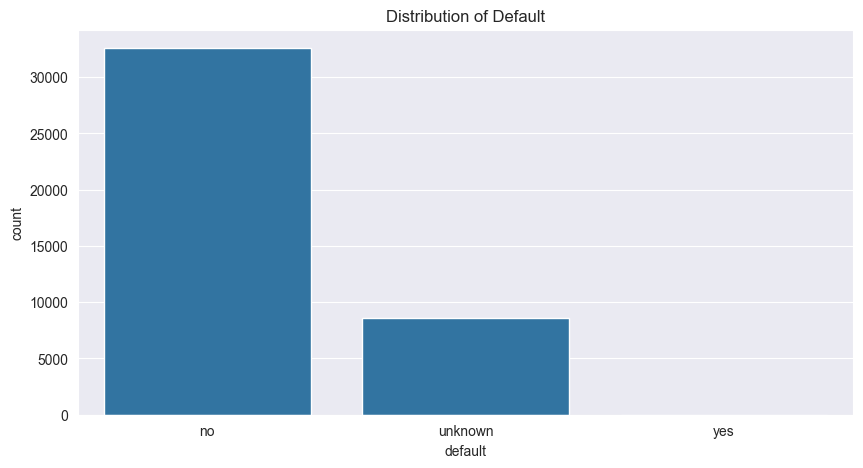

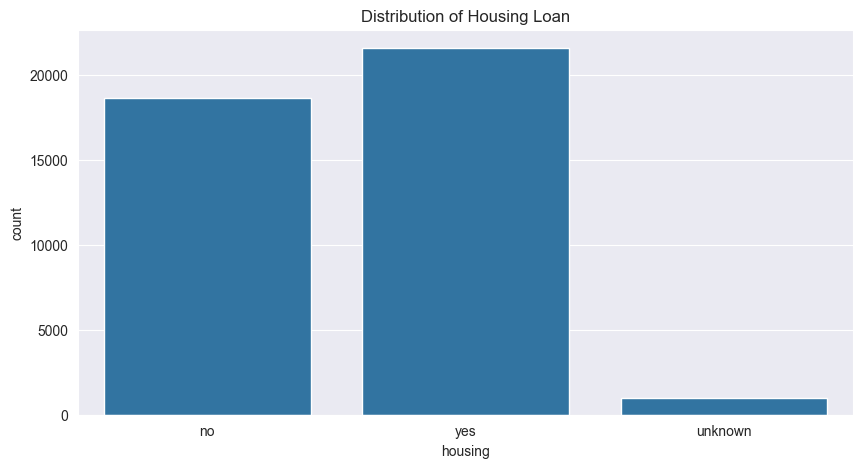

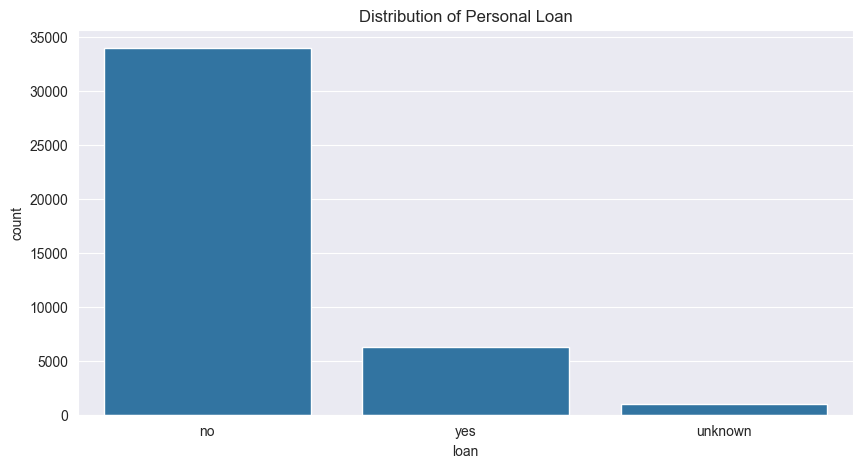

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv("bank-additional-full.csv", delimiter=";")

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='default')
plt.title(' Default')
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='housing')
plt.title('Housing')
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='loan')
plt.title('Loan')
plt.show()


In [ ]:
#code

In [ ]:
#code

**Завдання 8** Змінні **Jobs, Marital, Education, Default, Housing, Loan** трансформувати в неперервні змінні:

In [7]:
from sklearn.preprocessing import LabelEncoder

def encode_categorical_columns(df: pd.DataFrame, categorical_cols: list) -> pd.DataFrame:
    for col in categorical_cols:
        le = LabelEncoder()
        not_null = df[col][df[col].notnull()]
        df[col] = df[col].map(lambda x: le.fit_transform(x))
      
    return df


In [8]:
bank_client = encode_categorical_columns(bank_client, ['job', 'marital', 'education', 'default', 'housing',  'loan'])

NameError: name 'bank_client' is not defined

**Завдання 9** Трансфомувати змінну **Age** (використовуючи її квартильні значення):




In [10]:
import pandas as pd

def encode_age(dataframe: pd.DataFrame, age_col: str ) -> pd.DataFrame:
    dataframe['Age_encoded'] = pd.qcut(dataframe[age_col], q=4, labels=False)
    
    return dataframe

bank_client = pd.read_csv("bank-additional-full.csv", sep=';')

bank_client = encode_age(bank_client, 'age')


In [11]:
bank_client = encode_age(bank_client, 'age')

Age був поділений на 4 частини, а вони вже закодовані. Цей код дозволяє слідкувати чи трансформація віку працює корректно і чи відображаються границі

## Вибірка містить певну кількість атрибутів, які характеризують останій зв'язок кліентів з банком

**Завдання 10** Виділити в окремий датафрейм змінні, які характеризують зв'язок клієнтів з банком;
- вивести цей датафрейм;
- перевірити ці змінні на `NaN`.

In [12]:
import pandas as pd

data = {
    "default": ["no", "unknown", "no", "no"],
    "housing": ["no", "no", "yes", "no"],
    "loan": ["no", "no", "no", "no"],
}

df = pd.DataFrame(data)

bank_relationship_df = df[["default", "housing", "loan"]]

print(bank_relationship_df)

print(bank_relationship_df.isnull().sum())


Датафрейм, що характеризує зв'язок клієнтів з банком:
   default housing loan
0       no      no   no
1  unknown      no   no
2       no     yes   no
3       no      no   no

Перевірка наявності значень NaN:
default    0
housing    0
loan       0
dtype: int64


**Завдання 11** вивести унікальні значення, які містять атрибути `contact`, `month`, `day_of_week`

In [15]:
import pandas as pd

df = pd.read_csv("bank-additional-full.csv", delimiter=";")
unique_contact = df['contact'].unique()
unique_month = df['month'].unique()
unique_day_of_week = df['day_of_week'].unique()

print("contact:", unique_contact)
print("\nmonth:", unique_month)
print("\nday_of_week:", unique_day_of_week)


contact: ['telephone' 'cellular']

month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

day_of_week: ['mon' 'tue' 'wed' 'thu' 'fri']


# Провести аналіз змінної **Duration**

змінна ` duration` містить інформацію про тривалість останнього дзвінка, в секундах (числова). Важливе зауваження: цей атрибут сильно впливає на цільову змінну (наприклад, якщо тривалість = 0, тоді y = "ні"). Проте тривалість невідома до здійснення дзвінка. Крім того, після закінчення дзвінка y, очевидно, відомо. Таким чином, цей внесок слід включати лише для цілей порівняльних показників і відкидати, якщо метою є реалістична модель прогнозування.

**Завдання 12** Аналіз атрибуту `duration`:  

Провести візуальний аналіз зміної `duration`:  


*   побудувати  `boxplot` та `distplot`; 
*   перевірити розподіл по змінній `duration` на важкі хвости. 



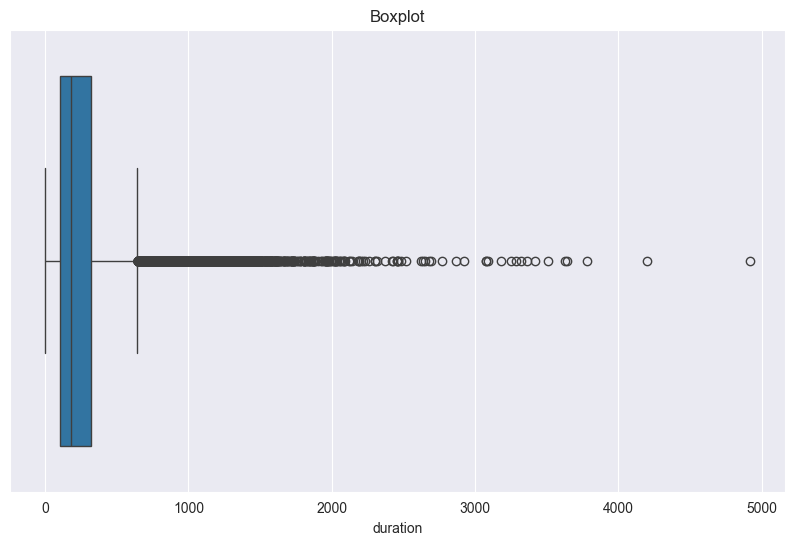

C:\Users\Igor\AppData\Local\Temp\ipykernel_9088\1057343929.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['duration'], kde=False, bins=30)


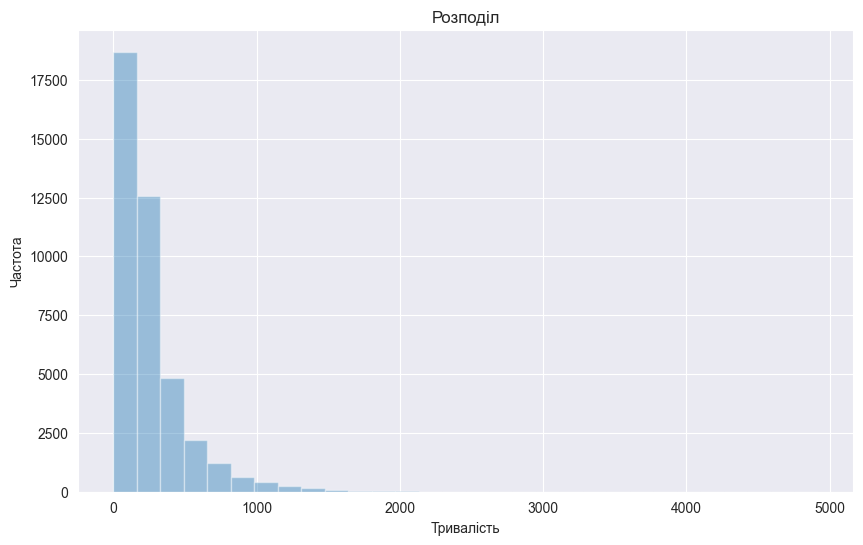

Коефіцієнт 3.263141255262832


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("bank-additional-full.csv", delimiter=";")

plt.figure(figsize=(10, 6))
sns.boxplot(x='duration', data=df)
plt.title('Boxplot')
plt.show()

plt.figure(figsize=(10, 6))
sns.distplot(df['duration'], kde=False, bins=30)
plt.title('Розподіл')
plt.xlabel('Тривалість')
plt.ylabel('Частота')
plt.show()

duration_skewness = df['duration'].skew()
print("Коефіцієнт", duration_skewness)


**Завдання 13** Закодувати змінні Contact, Month, Day of Week (використовуйте функцію `encode_categorical_columns()`)

In [18]:
import pandas as pd

def encode_categorical_columns(df: pd.DataFrame, categorical_cols: list) -> pd.DataFrame:
    from sklearn.preprocessing import LabelEncoder

    for col in categorical_cols:
        le = LabelEncoder()
        not_null = df[col][df[col].notnull()]
        df[col] = df[col].map(
            lambda x: le.fit(not_null).transform([x])[0] if pd.notnull(x) else x
        )

    return df

df = pd.read_csv("bank-additional-full.csv", delimiter=";")

categorical_cols = ['contact', 'month', 'day_of_week']

df_encoded = encode_categorical_columns(df, categorical_cols)

print(df_encoded.head())


   age        job  marital    education  default housing loan  contact  month  \
0   56  housemaid  married     basic.4y       no      no   no        1      6   
1   57   services  married  high.school  unknown      no   no        1      6   
2   37   services  married  high.school       no     yes   no        1      6   
3   40     admin.  married     basic.6y       no      no   no        1      6   
4   56   services  married  high.school       no      no  yes        1      6   

   day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0            1  ...         1    999         0  nonexistent          1.1   
1            1  ...         1    999         0  nonexistent          1.1   
2            1  ...         1    999         0  nonexistent          1.1   
3            1  ...         1    999         0  nonexistent          1.1   
4            1  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

**Завдання 14** Трансфомувати змінну **duration**, використовуючи її квартильні значення:

In [19]:
import pandas as pd

def encode_duration(dataframe: pd.DataFrame, duration_col: str) -> pd.DataFrame:
    Q1 = dataframe[duration_col].quantile(0.25)
    Q2 = dataframe[duration_col].quantile(0.5)
    Q3 = dataframe[duration_col].quantile(0.75)

    dataframe.loc[dataframe[duration_col] <= Q1, duration_col] = 0
    dataframe.loc[(dataframe[duration_col] > Q1) & (dataframe[duration_col] <= Q2), duration_col] = 1
    dataframe.loc[(dataframe[duration_col] > Q2) & (dataframe[duration_col] <= Q3), duration_col] = 2
    dataframe.loc[dataframe[duration_col] > Q3, duration_col] = 3

    return dataframe

df = pd.read_csv("bank-additional-full.csv", delimiter=";")

df = encode_duration(df, 'duration')

print(df.head())


   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

In [ ]:
bank_relat = encode_duration(bank_relat, 'duration')

## Провести аналіз атрибутів **соціального та економічного контексту**

**Завдання 15** Виділити в окремий датафрейм атрибути соціального та єкономічного контексту

In [21]:
import pandas as pd

def extract(dataframe: pd.DataFrame) -> pd.DataFrame:
    bank_soc = dataframe[['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]

    return bank_soc

df = pd.read_csv("bank-additional-full.csv", delimiter=";")

bank_soc = extract(df)

print(bank_soc.head())


   emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed
0           1.1          93.994          -36.4      4.857       5191.0
1           1.1          93.994          -36.4      4.857       5191.0
2           1.1          93.994          -36.4      4.857       5191.0
3           1.1          93.994          -36.4      4.857       5191.0
4           1.1          93.994          -36.4      4.857       5191.0


**Завдання 16** Виділити в окремий датафрейм всі інші атрибути атрибути - `campaign`, `pdays`,`previous`, `poutcome`

In [23]:
import pandas as pd

def extract(dataframe: pd.DataFrame) -> pd.DataFrame:
    bank_other = dataframe[['campaign', 'pdays', 'previous', 'poutcome']]

    return bank_other

df = pd.read_csv("bank-additional-full.csv", delimiter=";")

bank_other = extract(df)

print(bank_other.head())


   campaign  pdays  previous     poutcome
0         1    999         0  nonexistent
1         1    999         0  nonexistent
2         1    999         0  nonexistent
3         1    999         0  nonexistent
4         1    999         0  nonexistent


**Завдання 17** Провести трансформацію атрибуту `poutcome`

In [24]:
import pandas as pd

def transform(dataframe: pd.DataFrame) -> pd.DataFrame:
    dataframe['poutcome'] = dataframe['poutcome'].replace({'success': 0, 'failure': 1, 'nonexistent': 2})

    return dataframe

df = pd.read_csv("bank-additional-full.csv", delimiter=";")

df = transform(df)

print(df['poutcome'].head())


0    2
1    2
2    2
3    2
4    2
Name: poutcome, dtype: int64


C:\Users\Igor\AppData\Local\Temp\ipykernel_9088\3641801057.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataframe['poutcome'] = dataframe['poutcome'].replace({'success': 0, 'failure': 1, 'nonexistent': 2})


## Будування моделей класифікації

**Завдання 18** З'єднати всі отримані блоки в один датафрейм і перевірити, що він містить тільки потрібні для моделювання колонки

In [1]:
import pandas as pd

def encode(df: pd.DataFrame, categorical_cols: list) -> pd.DataFrame:
    df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=False)
    return df_encoded

def encode_duration(dataframe: pd.DataFrame, duration_col: str ) -> pd.DataFrame:
    duration_quantiles = dataframe[duration_col].quantile([0.25, 0.5, 0.75])
    dataframe[duration_col] = pd.cut(dataframe[duration_col], bins=[0, duration_quantiles[0.25], duration_quantiles[0.5], duration_quantiles[0.75], float('inf')], labels=[1, 2, 3, 4])
    return dataframe

def transform_poutcome(dataframe: pd.DataFrame) -> pd.DataFrame:
    dataframe['poutcome'] = dataframe['poutcome'].replace({'success': 0, 'failure': 1, 'nonexistent': 2})
    return dataframe

df = pd.read_csv("bank-additional-full.csv", delimiter=";")

categorical_cols = ['contact', 'month', 'day_of_week']
df_encoded = encode(df, categorical_cols)
df_encoded = encode_duration(df_encoded, 'duration')
df_encoded = transform_poutcome(df_encoded)
bank_relat = df_encoded[['duration', 'contact', 'month', 'day_of_week', 'poutcome']]
bank_socec = df_encoded[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan']]
bank_other = df_encoded[['campaign', 'pdays', 'previous']]
bank_final = pd.concat([bank_relat, bank_socec, bank_other], axis=1)
print(bank_final.head())



NameError: name 'pd' is not defined

**Завдання 19** Провести ділення вибірки

In [ ]:
def prepare_data_for_training(X: pd.DataFrame,
                              target: pd.Series,
                              test_size: float,
                              n_splits: int,
                              random_state: int):
    """
    Function that prepares data for training. Splits the data into train and test datasets and get k-folds for cross-validation

    X: pd.DataFrame with features
    target: target pd.Series
    test_size: the size of test datasets
    n_splits: number of cross-validation splits
    random_state: random state to reproduce the same split

    returns: X_train, X_test, y_train, y_test, k_fold
    """

    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=test_size, random_state=random_state)
    
    from sklearn.model_selection import KFold
    k_fold = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)

    return X_train, X_test, y_train, y_test, k_fold


In [ ]:
def scale_the_data(X_train: pd.DataFrame, 
                   X_test: pd.DataFrame):

    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled

X_train_scaled, X_test_scaled = scale_the_data(X_train, X_test)


In [ ]:
X_train, X_test = scale_the_data(X_train, X_test)

## Логістична Регресія

In [2]:
def train(X_train, y_train, X_test, y_test, k_fold):

    from sklearn.linear_model import LogisticRegression
    logmodel = LogisticRegression() 
    logmodel.fit(X_train, y_train)

    logpred = logmodel.predict(X_test)

    from sklearn.metrics import confusion_matrix, accuracy_score
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, logpred))

    accuracy = round(accuracy_score(y_test, logpred), 2) * 100
    print(f"Accuracy: {accuracy}%")

    from sklearn.model_selection import cross_val_score
    LOGCV = cross_val_score(logmodel, X_test, y_test, cv=k_fold, n_jobs=1, scoring='accuracy').mean()
    print(f"Cross-validated Accuracy: {LOGCV}")

train(X_train, y_train, X_test, y_test, k_fold)


NameError: name 'X_train' is not defined

## k-NN

In [ ]:
def find_optimal_k(X_train, y_train, X_test, y_test, k_fold, max_neighbors=25):
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.model_selection import cross_val_score
    import matplotlib.pyplot as plt
    import numpy as np

    neighbors = np.arange(1, max_neighbors + 1, 2)
    cv_scores = []

    for k in neighbors:
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn, X_train, y_train, cv=k_fold, scoring='accuracy')
        cv_scores.append(scores.mean() * 100)
        print("k=%d %0.2f (+/- %0.2f)" % (k, scores.mean() * 100, scores.std() * 100))

    optimal_k = neighbors[np.argmax(cv_scores)]
    print("optimal %d with %0.1f%%" % (optimal_k, cv_scores[optimal_k]))

    # Plot CV scores
    plt.plot(neighbors, cv_scores)
    plt.xlabel('Neighbors')
    plt.ylabel('ccuracy')
    plt.show()

    return optimal_k, cv_scores

optimal_k, _ = find_optimal_k(X_train, y_train, X_test, y_test, k_fold)

knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)
knnpred = knn.predict(X_test)

print("Confusion:")
print(confusion_matrix(y_test, knnpred))

accuracy = round(accuracy_score(y_test, knnpred), 2) * 100
print(f"Accuracy: {accuracy}%")

KNNCV = cross_val_score(knn, X_test, y_test, cv=k_fold, n_jobs=1, scoring='accuracy').mean()
print(f"Cross: {KNNCV}")


NameError: name 'neighbors' is not defined

## Логістична Регресія

In [ ]:
models = pd.DataFrame({
                'Models': ['LogisticRegression'],
                'Score':  [LOGCV]})

models.sort_values(by='Score', ascending=False)

**Висновки по моделям (детальні)**

Логістична модель показує 90% правильність, Вона не підходить
K-NN модель то саме, але точність завищена, тоже не підходить
Метрики - точність не збалансована, тому треба інші метрики